# ABDUL QUDDUS (64289)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option("display.max_colwidth", 200)

train = pd.read_csv('train.csv')
train.drop("id", axis='columns')
test = pd.read_csv('test.csv')
#test.drop("id", axis='columns')

In [9]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [10]:
test.head()

,Id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [11]:
print('Shape of Train data:', train.shape)
print('Shape of Test data:', test.shape)

Shape of Train data: (900000, 33)
Shape of Test data: (700000, 32)


In [12]:
print('Null Values in Train data:', train.isnull().values.any())
print('Null Values in Test data:', test.isnull().values.any())

Null Values in Train data: False
Null Values in Test data: False


In [13]:
print('Duplicate Values in Train data:', train.duplicated().sum())
print('Duplicate Values in Test data:', test.duplicated().sum())

Duplicate Values in Train data: 0
Duplicate Values in Test data: 0


In [14]:
print('No. of Unique elements in Train data:')
print(train.nunique())
print('------------------------------------')
print('No. of Unique elements in Test data:')
print(test.nunique())

No. of Unique elements in Train data:
id        900000
f_00      900000
f_01      900000
f_02      900000
f_03      900000
f_04      900000
f_05      900000
f_06      900000
f_07          16
f_08          16
f_09          15
f_10          15
f_11          14
f_12          16
f_13          13
f_14          14
f_15          15
f_16          16
f_17          14
f_18          14
f_19      900000
f_20      900000
f_21      900000
f_22      900000
f_23      900000
f_24      900000
f_25      900000
f_26      900000
f_27      741354
f_28      900000
f_29           2
f_30           3
target         2
dtype: int64
------------------------------------
No. of Unique elements in Test data:
Id      700000
f_00    700000
f_01    700000
f_02    700000
f_03    700000
f_04    700000
f_05    700000
f_06    700000
f_07        16
f_08        14
f_09        16
f_10        16
f_11        15
f_12        16
f_13        14
f_14        13
f_15        14
f_16        14
f_17        14
f_18        14
f_19    700000

In [15]:
print('Checking the type of our data:')
train.dtypes

Checking the type of our data:


id          int64
f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
dtype: object

In [16]:
train['target'].value_counts(normalize=True)


0    0.513512
1    0.486488
Name: target, dtype: float64

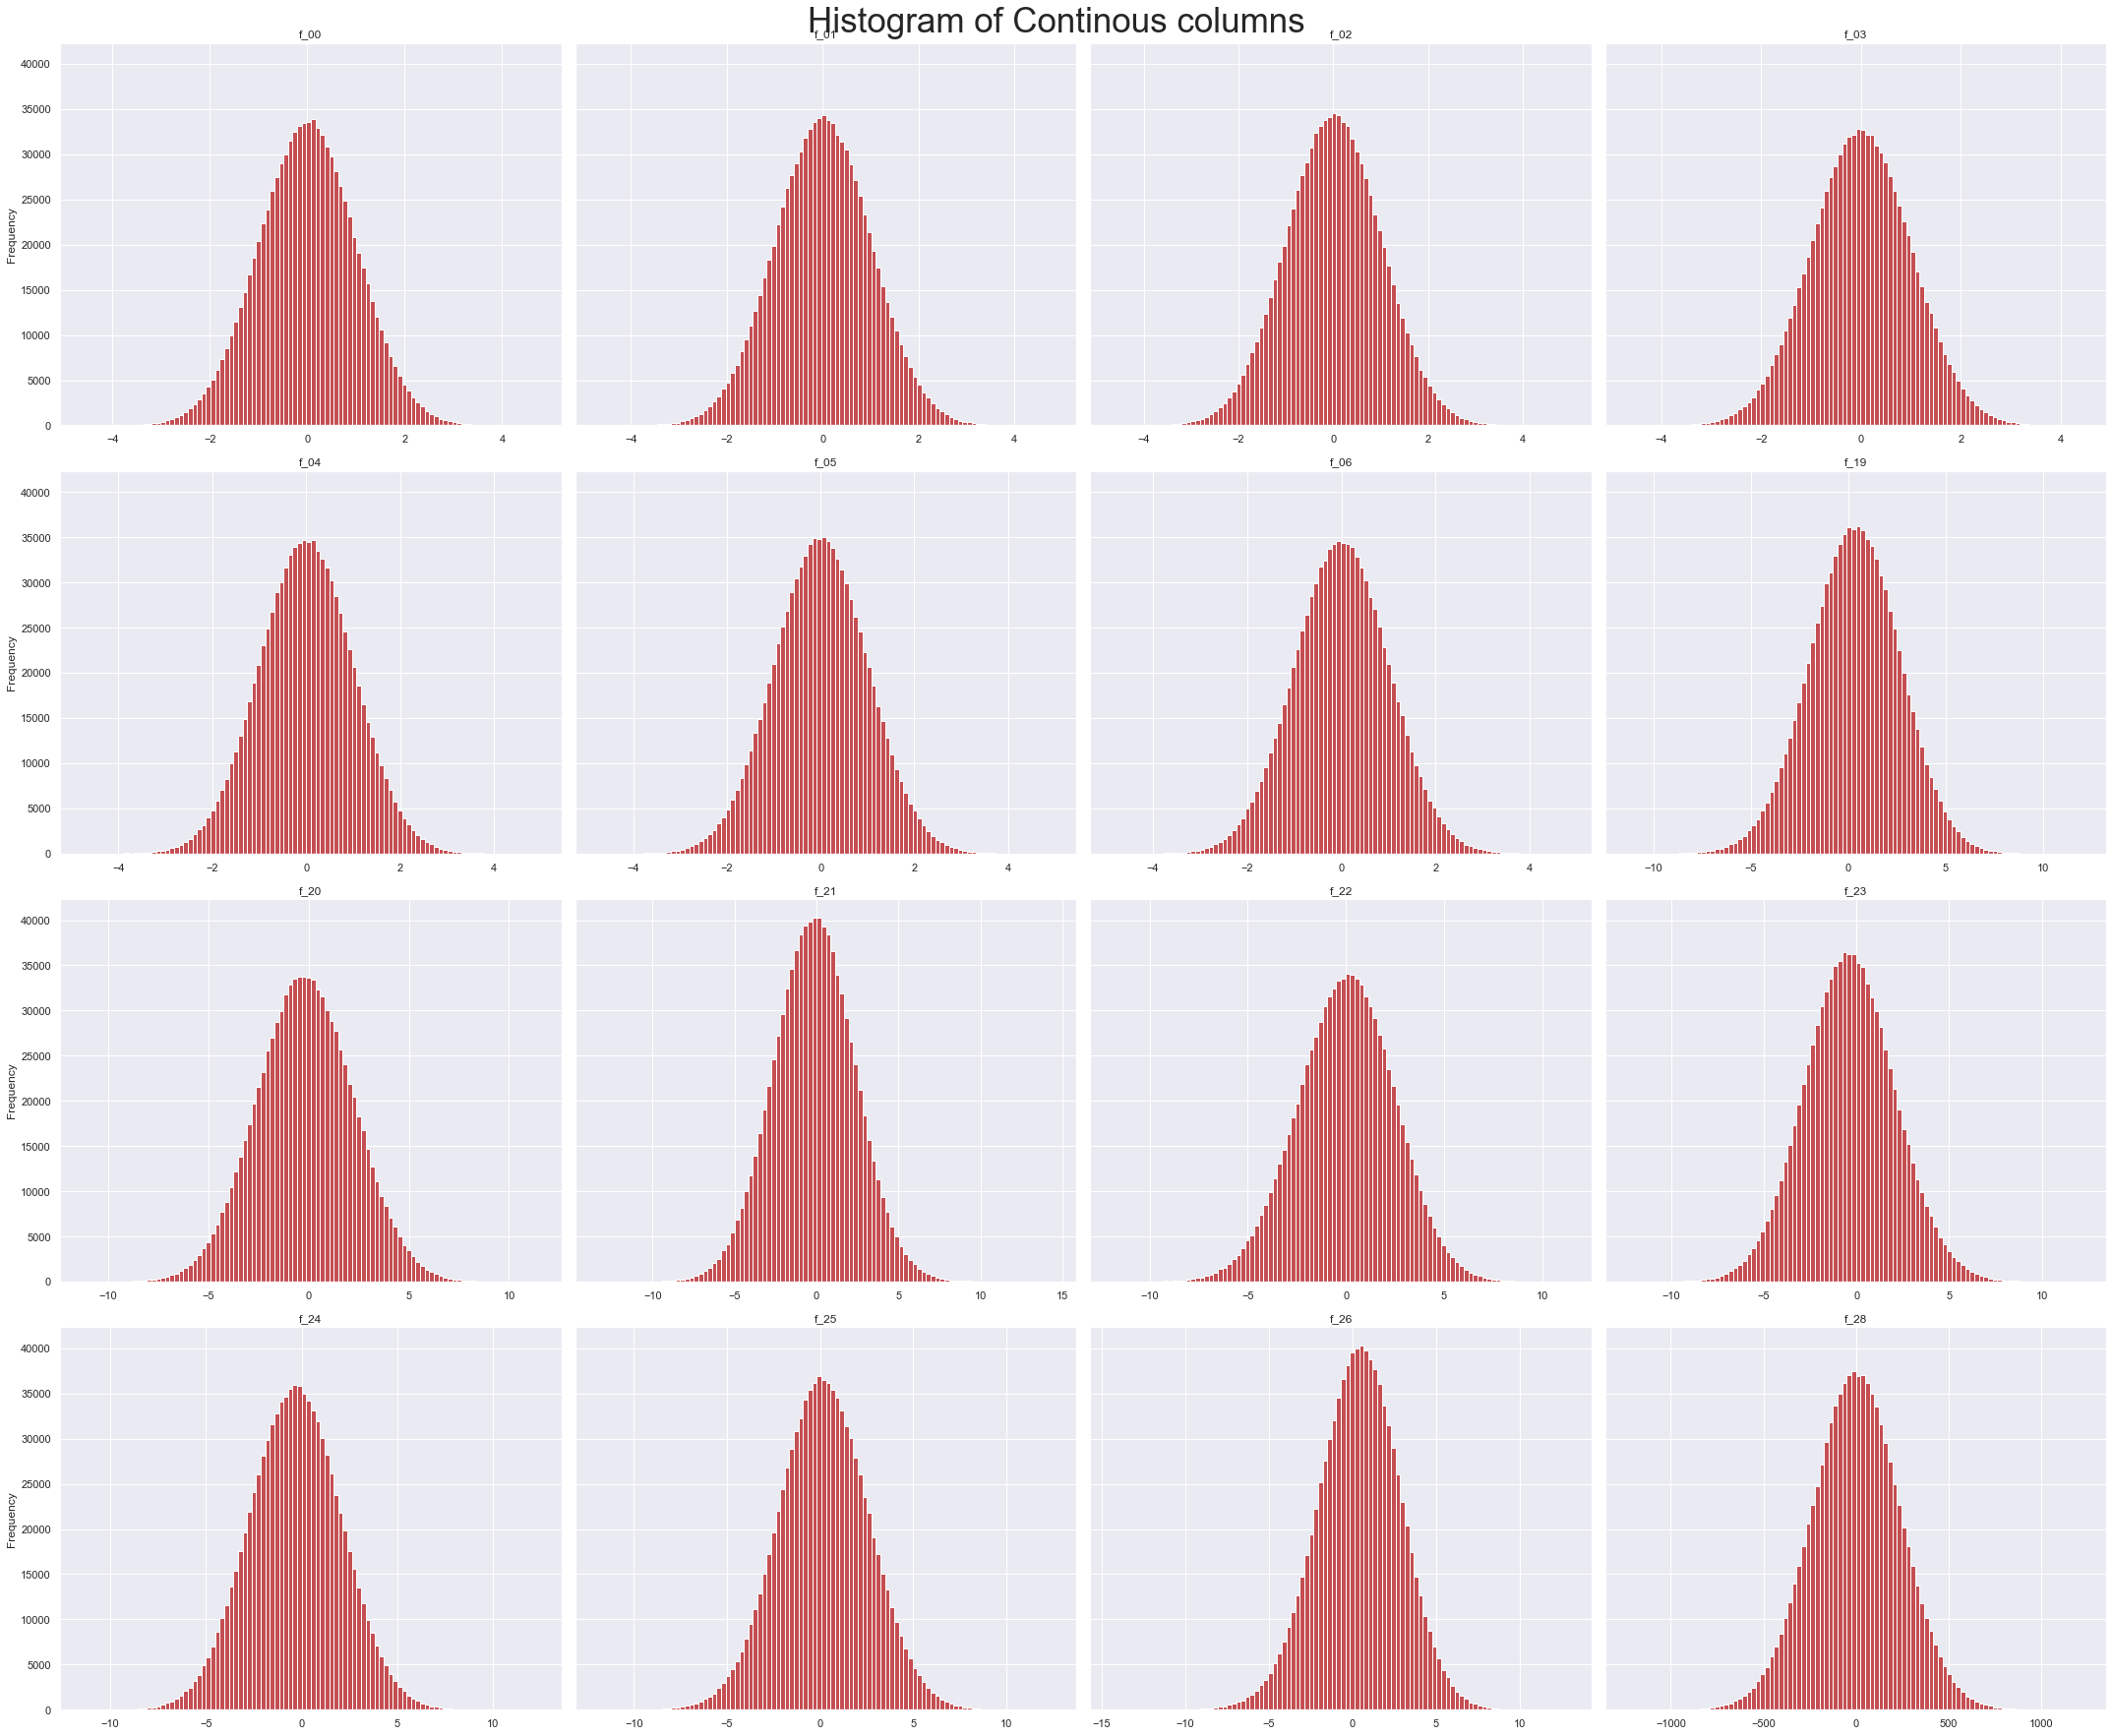

In [18]:
fig, ax = plt.subplots(4,4, figsize = (30,25) , sharey= True)
ax = ax.ravel()

for i,col in enumerate(train.dtypes[train.dtypes =="float64"].index):
    train[col].plot(ax = ax[i], kind = "hist", bins = 100, color = "r")
    ax[i].set_title(f"{col}")
fig.suptitle("Histogram of Continous columns", fontsize=35)
plt.tight_layout()
plt.show()

In [19]:
test['target'] = -1
test.head()

,Id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0,-1
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0,-1
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1,-1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0,-1
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2,-1


In [20]:
df = pd.concat([train,test])
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,Id
0,0.0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0,NaN
1,1.0,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1,NaN
2,2.0,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1,NaN
3,3.0,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1,NaN
4,4.0,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1,NaN


In [21]:
df.nunique()

id         900000
f_00      1600000
f_01      1600000
f_02      1600000
f_03      1600000
f_04      1600000
f_05      1600000
f_06      1600000
f_07           17
f_08           16
f_09           16
f_10           16
f_11           15
f_12           17
f_13           14
f_14           14
f_15           15
f_16           16
f_17           15
f_18           14
f_19      1600000
f_20      1600000
f_21      1600000
f_22      1600000
f_23      1600000
f_24      1600000
f_25      1600000
f_26      1600000
f_27      1181880
f_28      1600000
f_29            2
f_30            3
target          3
Id         700000
dtype: int64

In [22]:
train = df.query("target != -1").reset_index(drop=True)
test = df.query("target == -1").reset_index(drop=True)

In [23]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,Id
0,0.0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0,NaN
1,1.0,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1,NaN
2,2.0,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1,NaN
3,3.0,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1,NaN
4,4.0,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1,NaN


In [24]:
test = test.drop(['f_27','target'], axis=1)

test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,Id
0,NaN,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0,900000.0
1,NaN,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0,900001.0
2,NaN,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1,900002.0
3,NaN,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0,900003.0
4,NaN,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2,900004.0


In [39]:
train['target'].value_counts(normalize=True)
X = train.drop(['Id','target'], axis=1)

In [40]:
X = train.drop(['f_27','target'], axis=1)
y = train['target']

X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

In [41]:
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(720000, 32) (720000,)
(180000, 32) (180000,)


In [42]:
from sklearn.svm import SVC
print(X_train)

              id      f_00      f_01      f_02      f_03      f_04      f_05  \
394657  394657.0  0.889025  0.156984 -0.463970 -0.359268 -0.318893  0.278296   
517437  517437.0 -0.566257  0.835972  1.520039 -2.525316  0.101200  0.039224   
208118  208118.0 -0.495783  0.578138 -1.639720 -1.013108  0.666244  0.889416   
626437  626437.0 -1.504166  0.207928  0.504399 -0.505581  0.360182  0.351198   
699970  699970.0 -1.166926  1.774299  0.527605  0.117530 -0.080474  0.408386   
...          ...       ...       ...       ...       ...       ...       ...   
259178  259178.0  0.485585  1.197382 -1.739263  0.107500  1.207696  0.716411   
365838  365838.0 -0.885035  0.865033  1.736442 -0.878123 -0.309957 -0.434530   
131932  131932.0  0.341007  1.459316  2.308001 -0.066509 -1.895432  0.130976   
671155  671155.0 -1.058976 -0.324759 -0.484320  0.143031 -0.440077 -0.780925   
121958  121958.0 -0.164670  0.262780  0.648553  0.061342 -1.545156 -0.398207   

            f_06  f_07  f_08  ...      

In [38]:
classification_rbf = SVC(kernel='rbf')
classification_rbf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').